In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
GEN_PATH = 'drive/MyDrive/zt-feat43/'

# Data Preprocessing: Combining the Two CSVs #

In [ ]:
import ast
import numpy as np
import pandas as pd

In [ ]:
train_f3_df = pd.read_csv(GEN_PATH + 'train_feat3.csv').drop("Unnamed: 0", axis=1)
train_f4_df = pd.read_csv(GEN_PATH + 'train_emotion.csv').drop("Unnamed: 0", axis=1)

test_f3_df = pd.read_csv(GEN_PATH + 'test_feat3.csv').drop("Unnamed: 0", axis=1)
test_f4_df = pd.read_csv(GEN_PATH + 'test_emotion.csv').drop("Unnamed: 0", axis=1)

train_data = pd.concat([train_f3_df, train_f4_df], axis=1).drop("Unnamed: 0.1", axis=1)
train_data = train_data.rename({'0': 'emotions'}, axis=1)
test_data = pd.concat([test_f3_df, test_f4_df], axis=1).drop("Unnamed: 0.1", axis=1)
test_data = test_data.rename({'0': 'emotions'}, axis=1)

train_data

,movie,total_sent_num,avg_dialogue_speed,avg_word_per_sent,genre,emotions
0,100earthquake,1610,2.947354,26.067081,0,"ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,N..."
1,2012,1963,2.717890,29.704534,1,"ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,N..."
2,alitabattleangel,1392,2.713729,24.474856,2,"ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,N..."
3,annihilation,1087,2.723397,24.952162,3,"ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,N..."
4,awalktoremember,1114,1.990317,23.296230,4,"ND,ND,ND,ND,ND,ND,ND,ND,ND,NEU,NEU,NEU,ND,ND,N..."
...,...,...,...,...,...,...
83,truememoirsofaninternationalassassin,1790,3.228835,25.444693,7,"ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,N..."
84,underwaterbloodwars,955,2.744017,27.518325,9,"ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ANG,ND,ND,ND,..."
85,vampireacademy,1876,2.905035,32.531450,15,"ND,SAD,ND,ND,ND,ND,ND,ND,SAD,ND,ND,ND,ND,ND,ND..."
86,voyagers,1045,2.472964,26.444976,18,"ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,N..."


In [ ]:
test_data

,movie,total_sent_num,avg_dialogue_speed,avg_word_per_sent,genre,emotions
0,jumanjiwelcometothejungle,1861,2.316457,23.372918,17,"ND,ND,SAD,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,..."
1,paul,2282,2.831326,22.144610,5,"ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,N..."
2,shaolinsoccer,1251,2.318613,22.814548,10,"ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,N..."
3,spectre,1228,2.262470,27.491042,6,"ND,ND,ND,ND,ND,ND,ND,ND,ND,NEU,HAP,ND,ND,HAP,H..."
4,sputnik,993,3.098275,31.767372,3,"ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,SAD,SAD,ND,ND..."
5,thecore,2110,2.913491,26.554028,1,"ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,N..."
6,thediscovery,1396,2.988863,31.919771,12,"ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,HAP,ND,ND,ND,ND,..."
7,theedgeofseventeen,1705,3.056230,23.822874,16,"ND,ND,ND,ND,ND,ND,ND,SUR,NEU,SAD,SAD,SAD,NEU,S..."
8,thefastandthefurioustokyodrift,705,2.715657,31.390071,13,"ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,N..."
9,thefinalmaster,719,1.952446,33.002782,19,"ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,SAD,ND,ND,NEU,ND..."


In [ ]:
train_emotions = np.sort(np.array(train_data['emotions'].apply(lambda x: x.split(',')).apply(pd.Series).stack().unique()))
test_emotions = np.sort(np.array(test_data['emotions'].apply(lambda x: x.split(',')).apply(pd.Series).stack().unique()))

np.array_equal(train_emotions, test_emotions), train_emotions, test_emotions

(True, array(['ANG', 'DIS', 'FEA', 'HAP', 'ND', 'NEU', 'SAD', 'SUR'],
       dtype=object), array(['ANG', 'DIS', 'FEA', 'HAP', 'ND', 'NEU', 'SAD', 'SUR'],
       dtype=object))

In [ ]:
train_data['emotions'] = train_data['emotions'].apply(lambda x: x.split(','))

for e in train_emotions:
  train_data[e] = train_data['emotions'].apply(lambda x: sum([int(e == m) for m in x]))

train_data = train_data.drop('emotions', axis=1)
train_data = train_data[[c for c in train_data.columns if c != 'genre'] + ['genre']]

train_data

,movie,total_sent_num,avg_dialogue_speed,avg_word_per_sent,ANG,DIS,FEA,HAP,ND,NEU,SAD,SUR,genre
0,100earthquake,1610,2.947354,26.067081,3,0,8,7,134,8,19,0,0
1,2012,1963,2.717890,29.704534,1,0,3,3,320,3,15,0,1
2,alitabattleangel,1392,2.713729,24.474856,0,0,1,6,322,1,0,3,2
3,annihilation,1087,2.723397,24.952162,0,0,0,1,207,0,0,0,3
4,awalktoremember,1114,1.990317,23.296230,4,0,12,7,173,11,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,truememoirsofaninternationalassassin,1790,3.228835,25.444693,9,0,15,3,105,18,33,2,7
84,underwaterbloodwars,955,2.744017,27.518325,20,1,28,19,167,14,32,4,9
85,vampireacademy,1876,2.905035,32.531450,10,0,16,5,235,4,52,0,15
86,voyagers,1045,2.472964,26.444976,28,0,33,9,134,13,32,2,18


In [ ]:
test_data['emotions'] = test_data['emotions'].apply(lambda x: x.split(','))

for e in test_emotions:
  test_data[e] = test_data['emotions'].apply(lambda x: sum([int(e == m) for m in x]))

test_data = test_data.drop('emotions', axis=1)
test_data = test_data[[c for c in test_data.columns if c != 'genre'] + ['genre']]

test_data

,movie,total_sent_num,avg_dialogue_speed,avg_word_per_sent,ANG,DIS,FEA,HAP,ND,NEU,SAD,SUR,genre
0,jumanjiwelcometothejungle,1861,2.316457,23.372918,17,1,26,13,220,19,35,1,17
1,paul,2282,2.831326,22.144610,20,0,24,23,240,10,39,6,5
2,shaolinsoccer,1251,2.318613,22.814548,21,0,16,13,152,10,33,2,10
3,spectre,1228,2.262470,27.491042,12,0,25,13,237,9,23,2,6
4,sputnik,993,3.098275,31.767372,4,0,3,5,235,2,23,0,3
5,thecore,2110,2.913491,26.554028,1,0,3,2,239,4,10,0,1
6,thediscovery,1396,2.988863,31.919771,6,0,8,16,127,4,14,2,12
7,theedgeofseventeen,1705,3.056230,23.822874,13,0,31,35,109,28,55,26,16
8,thefastandthefurioustokyodrift,705,2.715657,31.390071,12,0,12,13,190,7,20,0,13
9,thefinalmaster,719,1.952446,33.002782,6,0,8,9,138,7,29,0,19


In [ ]:
train_data.to_csv(GEN_PATH + "train_feat43.csv")
test_data.to_csv(GEN_PATH + "test_feat43.csv")

# Data Preprocessing: Normalization #

In [ ]:
train_data = pd.read_csv(GEN_PATH + "train_feat43.csv").drop("Unnamed: 0", axis=1)
test_data =  pd.read_csv(GEN_PATH + "test_feat43.csv").drop("Unnamed: 0", axis=1)

train_data

,movie,total_sent_num,avg_dialogue_speed,avg_word_per_sent,ANG,DIS,FEA,HAP,ND,NEU,SAD,SUR,genre
0,100earthquake,1610,2.947354,26.067081,3,0,8,7,134,8,19,0,0
1,2012,1963,2.717890,29.704534,1,0,3,3,320,3,15,0,1
2,alitabattleangel,1392,2.713729,24.474856,0,0,1,6,322,1,0,3,2
3,annihilation,1087,2.723397,24.952162,0,0,0,1,207,0,0,0,3
4,awalktoremember,1114,1.990317,23.296230,4,0,12,7,173,11,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,truememoirsofaninternationalassassin,1790,3.228835,25.444693,9,0,15,3,105,18,33,2,7
84,underwaterbloodwars,955,2.744017,27.518325,20,1,28,19,167,14,32,4,9
85,vampireacademy,1876,2.905035,32.531450,10,0,16,5,235,4,52,0,15
86,voyagers,1045,2.472964,26.444976,28,0,33,9,134,13,32,2,18


In [ ]:
test_data

,movie,total_sent_num,avg_dialogue_speed,avg_word_per_sent,ANG,DIS,FEA,HAP,ND,NEU,SAD,SUR,genre
0,jumanjiwelcometothejungle,1861,2.316457,23.372918,17,1,26,13,220,19,35,1,17
1,paul,2282,2.831326,22.144610,20,0,24,23,240,10,39,6,5
2,shaolinsoccer,1251,2.318613,22.814548,21,0,16,13,152,10,33,2,10
3,spectre,1228,2.262470,27.491042,12,0,25,13,237,9,23,2,6
4,sputnik,993,3.098275,31.767372,4,0,3,5,235,2,23,0,3
5,thecore,2110,2.913491,26.554028,1,0,3,2,239,4,10,0,1
6,thediscovery,1396,2.988863,31.919771,6,0,8,16,127,4,14,2,12
7,theedgeofseventeen,1705,3.056230,23.822874,13,0,31,35,109,28,55,26,16
8,thefastandthefurioustokyodrift,705,2.715657,31.390071,12,0,12,13,190,7,20,0,13
9,thefinalmaster,719,1.952446,33.002782,6,0,8,9,138,7,29,0,19


### Normalization ###

In [ ]:
avg_vals = {col:0 for col in train_data.columns}
std_vals = {col:0 for col in train_data.columns}

for col in train_data.columns:
  if col == 'movie' or col == 'genre': continue
  avg = train_data[col].mean()
  std = train_data[col].std()

  avg_vals[col] = avg
  std_vals[col] = std

  train_data[col] = train_data[col].apply(lambda x: (x - avg_vals[col]) / std_vals[col])

for col in test_data.columns:
  if col == 'movie' or col == 'genre': continue
  test_data[col] = test_data[col].apply(lambda x: (x - avg_vals[col]) / std_vals[col])

train_data.describe()

,total_sent_num,avg_dialogue_speed,avg_word_per_sent,ANG,DIS,FEA,HAP,ND,NEU,SAD,SUR,genre
count,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,88.000000
mean,1.491862e-16,-4.683123e-15,-2.535850e-16,-4.163336e-17,1.602254e-16,3.154043e-17,8.137430e-17,-6.039992e-17,-4.037175e-17,-9.588290e-17,4.746834e-17,10.500000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.380646
min,-1.956704e+00,-2.559326e+00,-1.359074e+00,-1.323223e+00,-3.920805e-01,-1.435292e+00,-8.629549e-01,-1.922648e+00,-1.238208e+00,-1.718602e+00,-7.349844e-01,0.000000
25%,-7.407511e-01,-6.019828e-01,-4.917606e-01,-6.937979e-01,-3.920805e-01,-7.969240e-01,-6.106624e-01,-8.500504e-01,-7.755233e-01,-8.188283e-01,-7.349844e-01,5.000000
50%,-5.518131e-02,-5.381195e-02,-1.956442e-01,-1.902580e-01,-3.920805e-01,-1.585558e-01,-3.583700e-01,1.393284e-01,-1.393313e-01,-3.152617e-02,-3.756587e-01,10.500000
75%,5.031947e-01,5.669286e-01,2.109416e-01,3.447532e-01,-3.920805e-01,7.533989e-01,1.619832e-01,7.218599e-01,5.257785e-01,6.807948e-01,3.429927e-01,16.000000
max,2.934610e+00,2.365686e+00,5.673602e+00,3.460406e+00,4.208331e+00,3.124481e+00,3.236797e+00,2.201305e+00,3.966999e+00,2.180418e+00,4.295575e+00,21.000000


In [ ]:
test_data.describe()

,total_sent_num,avg_dialogue_speed,avg_word_per_sent,ANG,DIS,FEA,HAP,ND,NEU,SAD,SUR,genre
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,-0.056878,0.234944,-0.068599,-0.087261,-0.182971,-0.054925,0.091743,-0.340651,-0.028918,0.169560,0.179663,10.500000
std,1.025416,1.076167,0.563477,1.105412,0.676824,0.763668,0.904284,0.820367,1.045455,0.930387,1.989013,6.493587
min,-1.825091,-2.032134,-0.819897,-1.197338,-0.392081,-1.161706,-0.799882,-1.737717,-1.122537,-1.718602,-0.734984,0.000000
25%,-0.633692,-0.753841,-0.508119,-0.819683,-0.392081,-0.523338,-0.452980,-1.011865,-0.862277,-0.331451,-0.734984,5.250000
50%,-0.049288,0.610011,-0.201931,-0.504970,-0.392081,-0.204153,-0.137614,-0.480189,-0.139331,0.305889,-0.375659,10.500000
75%,0.539045,1.019639,0.146359,0.281811,-0.392081,0.639405,0.051605,0.523059,0.352272,0.662049,-0.016333,15.750000
max,2.034923,1.738776,1.043265,3.460406,1.908125,1.391767,2.984505,0.758846,2.810286,2.405361,8.607483,21.000000


# And Now, the Hard Part.. #

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

### Data ###

In [ ]:
train_X = train_data[[c for c in train_data.columns if c != 'movie' and c != 'genre']].to_numpy().astype('float32')
train_Y = train_data['genre'].to_numpy().astype('int64')

valid_X = test_data[[c for c in test_data.columns if c != 'movie' and c != 'genre']].to_numpy().astype('float32')
valid_Y = test_data['genre'].to_numpy().astype('int64')

# train_X = train_data[['total_sent_num', 'avg_dialogue_speed', 'avg_word_per_sent']].to_numpy().astype('float32')
# train_Y = train_data['genre'].to_numpy().astype('int64')

# valid_X = test_data[['total_sent_num', 'avg_dialogue_speed', 'avg_word_per_sent']].to_numpy().astype('float32')
# valid_Y = test_data['genre'].to_numpy().astype('int64')

train_X = torch.from_numpy(train_X)
train_Y = torch.from_numpy(train_Y)
valid_X = torch.from_numpy(valid_X)
valid_Y = torch.from_numpy(valid_Y)

train_X.shape, train_Y.shape, valid_X.shape, valid_Y.shape

(torch.Size([88, 11]),
 torch.Size([88]),
 torch.Size([22, 11]),
 torch.Size([22]))

In [ ]:
batch_size = 4

train_ds = TensorDataset(train_X, train_Y)
valid_ds = TensorDataset(valid_X, valid_Y)

train_dl = DataLoader(train_ds, batch_size, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size)

In [ ]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

def to_device(data, device):
  if isinstance(data, (list,tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)

class DeviceDataLoader():
  def __init__(self, dl, device):
    self.dl = dl
    self.device = device
    
  def __iter__(self):
    for b in self.dl: 
        yield to_device(b, self.device)

  def __len__(self):
    return len(self.dl)

device = get_default_device()
train_loader = DeviceDataLoader(train_dl, device)
valid_loader = DeviceDataLoader(valid_dl, device)

### Model ###

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class Feat43Model(nn.Module):
  def __init__(self, feat_size, num_classes):
    super().__init__()
    self.linear1 = nn.Linear(feat_size, 20)
    self.linear2 = nn.Linear(20, num_classes)

  def forward(self, xb):
    out = self.linear1(xb)
    out = F.relu(out)
    out = self.linear2(out)
    return out

  def training_step(self, batch):
    feats, labels = batch
    out = self(feats)
    loss = F.cross_entropy(out, labels)
    return loss

  def validation_step(self, batch):
    feats, labels = batch
    out = self(feats)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [ ]:
model = Feat43Model(11, 22)
to_device(model, device)
model

Feat43Model(
  (linear1): Linear(in_features=11, out_features=22, bias=True)
)

### Training ###

In [ ]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
  history = []
  optimizer = opt_func(model.parameters(), lr, weight_decay=1e-4)
  for epoch in range(epochs):
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)
  return history

In [ ]:
model = Feat43Model(11, 22)
to_device(model, device)
model

history = [evaluate(model, valid_loader)]
history

[{'val_acc': 0.0416666679084301, 'val_loss': 3.1933751106262207}]

In [ ]:
history += fit(100, 1e-3, model, train_loader, valid_loader)

Epoch [0], val_loss: 3.1930, val_acc: 0.0417
Epoch [1], val_loss: 3.1922, val_acc: 0.0417
Epoch [2], val_loss: 3.1947, val_acc: 0.0417
Epoch [3], val_loss: 3.1939, val_acc: 0.0417
Epoch [4], val_loss: 3.1936, val_acc: 0.0417
Epoch [5], val_loss: 3.1954, val_acc: 0.0417
Epoch [6], val_loss: 3.1982, val_acc: 0.0417
Epoch [7], val_loss: 3.1988, val_acc: 0.0417
Epoch [8], val_loss: 3.2038, val_acc: 0.0417
Epoch [9], val_loss: 3.2065, val_acc: 0.0417
Epoch [10], val_loss: 3.2097, val_acc: 0.0417
Epoch [11], val_loss: 3.2126, val_acc: 0.0417
Epoch [12], val_loss: 3.2156, val_acc: 0.0417
Epoch [13], val_loss: 3.2173, val_acc: 0.0417
Epoch [14], val_loss: 3.2218, val_acc: 0.0417
Epoch [15], val_loss: 3.2270, val_acc: 0.0000
Epoch [16], val_loss: 3.2305, val_acc: 0.0000
Epoch [17], val_loss: 3.2348, val_acc: 0.0000
Epoch [18], val_loss: 3.2372, val_acc: 0.0000
Epoch [19], val_loss: 3.2431, val_acc: 0.0000
Epoch [20], val_loss: 3.2473, val_acc: 0.0000
Epoch [21], val_loss: 3.2518, val_acc: 0.000

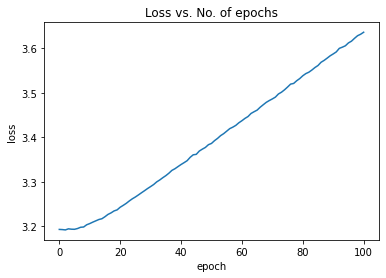

In [ ]:
losses = [x['val_loss'] for x in history]
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

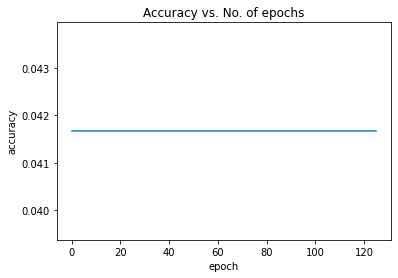

In [ ]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');